<a href="https://colab.research.google.com/github/EmmanuelChinkaka/W24-GEOG271-Geographic-Data-Analysis-/blob/main/NEW_DEMO/GIS_Data_Displays_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Displaying Geographic Data Using Python - GEOG271**##

##**Class Demo**##

> **By Emmanuel Chinkaka**

> **University of Delaware**

> **Department of Geography and Spatial Sciences**

In this notebook, we will learn an easy way to plot Geographic data. The python libraries required are :

> pandas

> matplotlib

> geopandas

We know that pandas and matplotlib are commmonly used python libraries for data analysis and plotting graphs. Now lets see what is geopandas?

**GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by 'pandas' to allow spatial operations on geometric types. Geometric operations are performed by 'shapely'. Geopandas further depends on 'fiona' for file access and 'descartes' and 'matplotlib' for plotting. More details can be found here**

How to install geopandas : pip install geopandas




> **A shapefile** is a simple, nontopological format for storing the geometric location and attribute information of geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas)


In [2]:
#Installing Geopandas
!pip install geopandas

In [3]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/24W GEOG271 Course/Data/data_India.csv')
df.head()

,FID,Shape,state,paramedics,density
0,1,Polygon,Arunanchal Pradesh,62,566
1,2,Polygon,Assam,23,4324
2,3,Polygon,Bihar,344,566
3,4,Polygon,Chandigarh,4556,777
4,5,Polygon,Chhattisgarh,6778,733


In [6]:
df

,FID,Shape,state,paramedics,density
0,1,Polygon,Arunanchal Pradesh,62,566
1,2,Polygon,Assam,23,4324
2,3,Polygon,Bihar,344,566
3,4,Polygon,Chandigarh,4556,777
4,5,Polygon,Chhattisgarh,6778,733
5,6,Polygon,Dadara & Nagar Havelli,345,5567
6,7,Polygon,Daman & Diu,234,4322
7,8,Polygon,Goa,4567,345
8,9,Polygon,Gujarat,897,567
9,10,Polygon,Haryana,5678,777


In [7]:
df.head()

,FID,Shape,state,paramedics,density
0,1,Polygon,Arunanchal Pradesh,62,566
1,2,Polygon,Assam,23,4324
2,3,Polygon,Bihar,344,566
3,4,Polygon,Chandigarh,4556,777
4,5,Polygon,Chhattisgarh,6778,733


In [8]:
shapefile = gpd.read_file('/content/drive/MyDrive/24W GEOG271 Course/Data/India States/Indian_states.shp')
shapefile.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


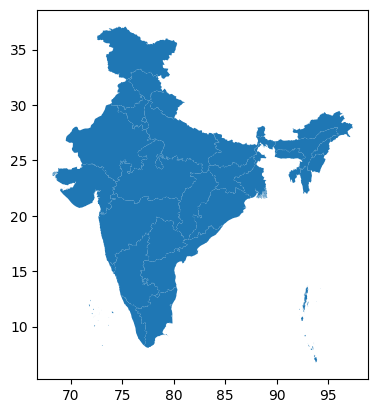

In [9]:
shapefile.plot();

In [10]:
shapefile = shapefile.rename(columns={"st_nm": "State"})

shapefile.head()

,State,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [11]:
merged = shapefile.set_index('State').join(df.set_index('state'))
merged.head()

,geometry,FID,Shape,paramedics,density
State,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,Polygon,62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2.0,Polygon,23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",3.0,Polygon,344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4.0,Polygon,4556.0,777.0


In [12]:
data = merged.dropna()
data.head()

,geometry,FID,Shape,paramedics,density
State,,,,,
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,Polygon,62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2.0,Polygon,23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",3.0,Polygon,344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4.0,Polygon,4556.0,777.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",5.0,Polygon,6778.0,733.0


In [13]:
merged = merged.drop(columns=['FID', 'Shape'])
merged.head()

,geometry,paramedics,density
State,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4556.0,777.0


In [14]:
data = merged.dropna()
data.head()

,geometry,paramedics,density
State,,,
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4556.0,777.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",6778.0,733.0


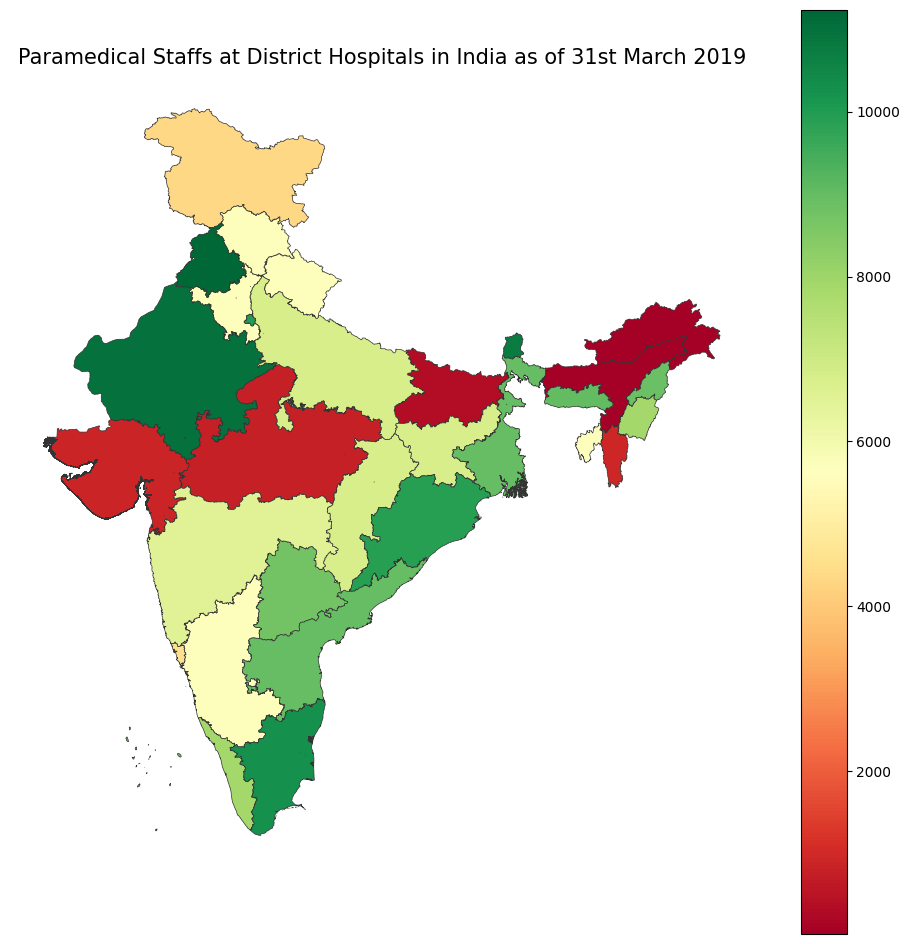

In [15]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Paramedical Staffs at District Hospitals in India as of 31st March 2019',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = data.plot(column='paramedics', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

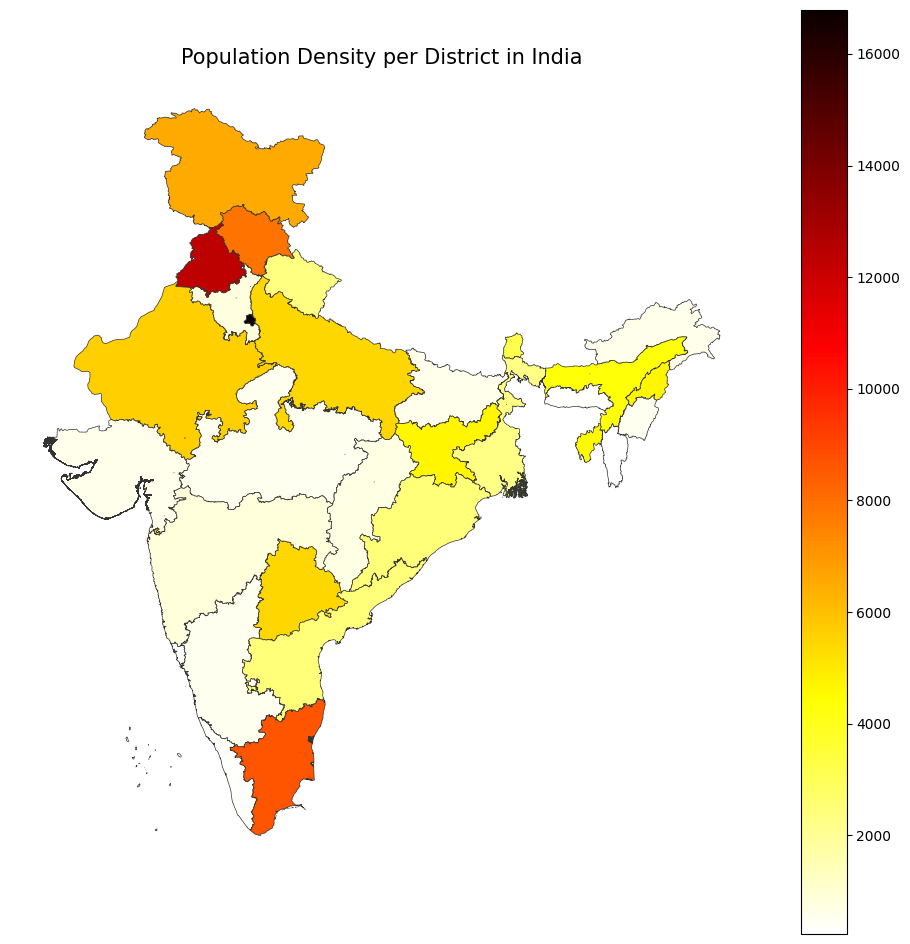

In [16]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Population Density per District in India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = data.plot(column='density', cmap='hot_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)